# Introdução ao aprendizado de máquina utilizando Python

#### Professor: Luiz Antonio de Sousa Ferreira

#### Contato: luiz.ferreira@outlook.com | [@luizsferreira](http://instagram.com/luizsferreira) (IG)

Acesso: [bit.ly/pucpcaldas](http://bit.ly/pucpcaldas)

__________

Para desenvolvermos o nosso "Hello World" em machine learning, vamos precisar de que exista as seguintes bibliotecas funcionais:

- SciPy
- Numpy
- Matplotlib
- Sklearn

Lembre-se sempre que o Python nos proporciona a instalação via comando `pip` que poderá instalar algumas dependências que podem ser solicitadas durante as intalações. Podemos utilizar também os mecanismos proporcionados pelo `Anaconda`.



In [ ]:
# Importando as bibliotecas
import scipy
import numpy
import matplotlib
import pandas
import sklearn

Podemos ainda verificar as versões de cada biblioteca com o trecho abaixo:

In [ ]:
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

### Importação de dados

Agora que já temos as dependências satisfeitas, passamos para a importação dos dados que desejamos analisar. No nosso exemplo vamos usar o, já muito difundido, Dataset de testes da biblioteca `sklearn` chamado `iris flower`, podendo ser encontrado em diversos exemplos internet a fora.

Esse Dataset possui cerca de 150 observações relacionadas à espécie de flor conhecida como iris.

![](https://www.gardendesign.com/pictures/images/900x705Max/site_3/iris-cristata-dwarf-crested-iris-purple-flower-shutterstock-com_12594.jpg)

Bonita né?!

Nesse dataset podemos identificar quatro colunas com medidas relacionadas às medidas da flor em centímetros. A quinta coluna é a espécie que fora analisada, sendo que todas se encaixam em três tipos de espécies.

Esse Dataset é tão famoso que possui uma página na Wikipédia para maiores esclarecimentos do projeto! [Link aqui](https://www.gardendesign.com/pictures/images/900x705Max/site_3/iris-cristata-dwarf-crested-iris-purple-flower-shutterstock-com_12594.jpg)!

Para trabalharmos com esse Dataset, devemos importar o seu arquivo em `.CSV`.

In [ ]:
# Melhorando nossas solicitações de acesso à bibliotecas
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Atenção, se essa parte apresentar algum erro, você deve checar novamente a instalação das bibliotecas, experimente executar o teste de versões fornecido no início dessa parte, ele pode ser importante para localizar qual biblioteca está causando problemas.

#### Passamos então para a importação!

Utilizaremos a biblioteca `pandas` para importar os dados diretamente do `repositório UCI Machine Learning`, o pandas também nos ajudará a realizar alguns trabalhos estatísticos. No nosso exemplo, faremos com que a base já seja importada com os nomes de cada coluna, para que facilite nosso trabalho.



In [ ]:
## Importação dos dados
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepala-comp', 'sepala-larg', 'petala-comp', 'petala-larg', 'especie']
dataset = pandas.read_csv(url, names=names)

In [ ]:
display(dataset[:10])

Agora podemos dar uma olhada nos dados, procurando características dos mesmos.

Comecemos pela dimensão de nossa base de dados:

In [ ]:
display(dataset.shape)

O que esperávamos, 150 linhas de dados distribuídos em 5 colunas.

Agora vamos gerar relatórios estatísticos sobre esse dataframe:

In [ ]:
display(dataset.describe())

Aqui está os resumos de nossa base, atente-se para os dados que o `boxplot` utiliza, os famosos quartis.

Podemos também verificar a única coluna não apresentada acima, vamos verificar nossos dados categóricos:

In [ ]:
display(dataset.groupby('especie').size())

### Vamos conhecer melhor nossa base?

Que tal gerarmos alguns gráficos de nossas variáveis, lembrem-se do 3 passo do esquema da aula passada `Visualização de dados univariados`:

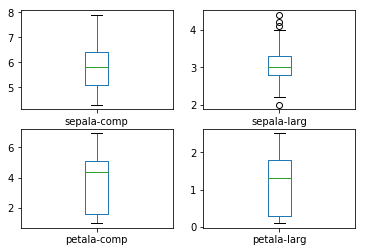

In [16]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

Temos então nossos dados dentro de gráficos conhecidos como `boxplot`, lembra como funcionam?
Ei, parece que tem algo nos dados de largura da sépala, não parece?

Podemos também listar a distribuição de nosos dados através de um `histograma`:

In [ ]:
dataset.hist()
plt.show()

Parece que temos duas gaussianas quando observamos os dados de sépala. Isso pode ser usado na escolha de nosso algoritmo.

Podemos também utilizar o gráfico de distribuição (scatter plot) para analisar nossa base de dados, conforme o item 4 da aula passada, sobre `Visualização de dados multivariados`:

In [ ]:
scatter_matrix(dataset)
plt.show()

## Criando conjuntos de dados de validação

Sempre quando geramos um novo modelo de exploração de dados, precisamos saber que o modelo que criamos é bom.

Mais tarde, usaremos métodos estatísticos para estimar a precisão dos modelos que criamos em dados não vistos. Também queremos uma estimativa mais concreta da precisão do melhor modelo em dados não vistos, avaliando-o em dados reais não vistos.

Ou seja, vamos reter alguns dados que os algoritmos não conseguirão ver e usaremos esses dados para obter uma segunda e independente ideia de quão preciso o melhor modelo pode realmente ser.

Vamos dividir o conjunto de dados carregado em dois, 80% dos quais usaremos para treinar nossos modelos e 20% que iremos reter como um conjunto de dados de validação.

In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Agora você tem dados de treinamento no X_train e no Y_train para preparar modelos e um X_validation e Y_validation sets que podemos usar mais tarde.

## Validação cruzada

Usaremos validação cruzada de 10 vezes para estimar a precisão de nossos dados. Isso dividirá nosso conjunto de dados em 10 partes, treinar em 9 e testar em 1 e repetir para todas as combinações de divisões de train-tests.

In [ ]:
seed = 7
scoring = 'accuracy'

Estamos usando a métrica de 'precisão' para avaliar modelos. Essa é uma proporção do número de instâncias corretamente previstas divididas pelo número total de instâncias no conjunto de dados multiplicado por 100 para fornecer uma porcentagem (por exemplo, 95% de precisão). 
Nós estaremos usando a  variável de pontuação quando nós executarmos, construirmos e avaliarmos cada modelo a seguir.

Graças aos plots, temos alguma noção sobre a dimensionalidade dos dados, como alguns são lineares, podemos obter um bom resultado.

Vamos avaliar 6 algoritmos diferentes:

- Regressão Logística (LR)
- Análise Linear Discriminante (LDA)
- K-vizinhos mais próximos (KNN)
- Árvores de Classificação e Regressão (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)

Esta é uma boa mistura de algoritmos simples lineares (LR e LDA), não lineares (KNN, CART, NB e SVM). Redefinimos o número aleatório de sementes antes de cada execução para garantir que a avaliação de cada algoritmo seja executada usando exatamente as mesmas divisões de dados. Isso garante que os resultados sejam diretamente comparáveis.

Vamos construir e avaliar nossos cinco modelos:

In [13]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

Agora temos 6 modelos e estimativas de precisão para cada um. Precisamos comparar os modelos entre si e selecionar os mais precisos.

Podemos ver que parece que o KNN tem a maior pontuação de precisão estimada.

Também podemos criar um gráfico dos resultados da avaliação do modelo e comparar o spread e a precisão média de cada modelo. Há uma população de medidas de precisão para cada algoritmo porque cada algoritmo foi avaliado 10 vezes (validação cruzada de 10 vezes).


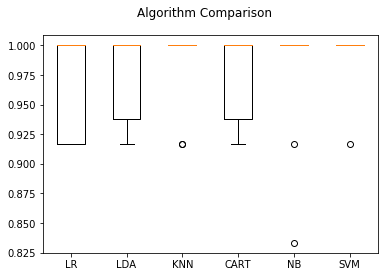

In [14]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Fazendo previsões

O algoritmo KNN foi o modelo mais preciso que testamos. Agora queremos ter uma ideia da precisão do modelo em nosso conjunto de validação.

Isso nos dará uma verificação final independente da precisão do melhor modelo. É importante manter um conjunto de validação apenas no caso de você ter feito uma falha durante o treinamento, como overfitting no conjunto de treinamento ou um vazamento de dados. Ambos resultarão em um resultado excessivamente otimista.

Podemos executar o modelo KNN diretamente no conjunto de validação e resumir os resultados como uma pontuação final de precisão, uma matriz de confusão e um relatório de classificação.

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



Podemos ver que a precisão é de 0,9 ou 90%. 

A matriz de confusão fornece uma indicação dos três erros cometidos. 

Finalmente, o relatório de classificação fornece um detalhamento de cada classe por precisão, recordação, pontuação de f1 e suporte mostrando resultados excelentes (dado que o conjunto de dados de validação era pequeno).

In [31]:
from tabulate import tabulate

table = [["Iris-setosa",7,0,0,0],["Iris-veriscolor",0,11,1,1],["Iris-virginica",0,2,9,2],["FP",0,2,1,3]]
print(tabulate(table, headers=["Especie", "Iris-setosa", "Iris-veriscolor","Iris-virginica", "FN"]))

Especie            Iris-setosa    Iris-veriscolor    Iris-virginica    FN
---------------  -------------  -----------------  ----------------  ----
Iris-setosa                  7                  0                 0     0
Iris-veriscolor              0                 11                 1     1
Iris-virginica               0                  2                 9     2
FP                           0                  2                 1     3


## Como analisar?

#### Precisão

Apesar de alguns traduzirem a métrica anterior (accuracy) como precisão vamos utilizar apenas a descrição a seguir: daqueles que classifiquei como corretos, quantos efetivamente eram? Traduzindo em fórmula temos:

$$ Precisão = \frac{Verdadeiros Positivos (TP)}{Verdadeiros Positivos (TP) - Falsos Positivos (FP)}$$

#### Recall ou revocação

O recall é a frequência em que o seu classificador encontra os exemplos de uma classe, ou seja, “quando realmente é da classe X, o quão frequente você classifica como X?”. Traduzindo para fórmula:

$$ Recall = \frac{Verdadeiros Positivos(TP)}{(Verdadeiros Positivos(TP) + Falsos Negativos (FN)}$$

Se o seu classificador não comete nenhum erro então a precisão do mesmo é igual ao seu recall e ambos possuem valor 1.0. Mas no mundo real isso é algo impossível de se atingir.

Podemos então combinar essas duas métricas em uma medida única: o F1.

#### F1 Score

Essa métrica combina precisão e recall de modo a trazer um número único que indique a qualidade geral do seu modelo e trabalha bem até com conjuntos de dados que possuem classes desproporcionais.

A fórmula que define o F1 é a seguinte (quanto maior melhor o modelo):

$$ F1 = \frac {2 * precisão * recall}{precisão + recall}$$


___

## Agradecimentos

Agradeço ao Curso de Ciência da Computação da PUC Minas - Campus Poços de Caldas pela oportunidade de dividir um pouco de meu conhecimento com a comunidade acadêmica.

Agradeço também aos participantes, a qualidade do curso só demonstra a grande capacidade que possuem, espero encontrar vocês em breve, porém, como sucedidos profissionais na área.

___

Fontes: 

Brownlee, J. Your First Machine Learning Project in Python Step-By-Step. Disponível em: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/. Acesso em: 26/10/2019

Leal, R. S. Métricas Comuns em Machine Learning: como analisar a qualidade de chat bots inteligentes. Disponível em: https://medium.com/as-m%C3%A1quinas-que-pensam/m%C3%A9tricas-comuns-em-machine-learning-como-analisar-a-qualidade-de-chat-bots-inteligentes-m%C3%A9tricas-1ba580d7cc96. Acesso em: 26/10/2018.

